In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
url = '../output/classification_model/csv/'

accuraccy = pd.read_csv(url + 'initial_classification_accuracy.csv')
metrics = pd.read_csv(url + 'initial_classification_metrics.csv')

In [113]:
accuraccy["avg"].item()

0.93

In [114]:
metrics[[col for  col in metrics.columns if '.3' in col]]

,glioma.3,meningioma.3,notumor.3,pituitary.3
0,avg,avg,avg,avg
1,0.93,0.83,0.98,0.98
2,0.91,0.88,0.99,0.94
3,0.93,0.86,0.98,0.96


In [115]:
urls = glob.glob(url+'*.csv')

values = {
    'p':[],
    'r':[],
    'f':[],
    'a':[]
}

In [116]:
urls

['../output/classification_model/csv\\initial_classification_accuracy.csv',
 '../output/classification_model/csv\\initial_classification_metrics.csv',
 '../output/classification_model/csv\\only_synthetic_classification_accuracy.csv',
 '../output/classification_model/csv\\only_synthetic_classification_metrics.csv',
 '../output/classification_model/csv\\synthetic_classification_1_accuracy.csv',
 '../output/classification_model/csv\\synthetic_classification_1_metrics.csv',
 '../output/classification_model/csv\\synthetic_classification_2.1_accuracy.csv',
 '../output/classification_model/csv\\synthetic_classification_2.1_metrics.csv',
 '../output/classification_model/csv\\synthetic_classification_2.2_accuracy.csv',
 '../output/classification_model/csv\\synthetic_classification_2.2_metrics.csv',
 '../output/classification_model/csv\\synthetic_classification_2.3_accuracy.csv',
 '../output/classification_model/csv\\synthetic_classification_2.3_metrics.csv',
 '../output/classification_model/csv

In [117]:
for i in range(0, len(urls), 2):

    accuraccy = pd.read_csv(urls[i])
    metrics = pd.read_csv(urls[i+1])
    

    p = metrics[[col for  col in metrics.columns if '.3' in col]].iloc[1].astype(float).to_list()
    r = metrics[[col for  col in metrics.columns if '.3' in col]].iloc[2].astype(float).to_list()
    f = metrics[[col for  col in metrics.columns if '.3' in col]].iloc[3].astype(float).to_list()

    values['a'].append(accuraccy["avg"].item())
    
    values['p'].append(p)
    values['r'].append(r)
    values['f'].append(f)

In [118]:
x_labels = ['real data', 'only_synthetic', 'balanced', '+synth meningioma (11%)', '+synth meningioma (%25)', '+synth meningioma (50%)', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth across all clesses', '+synth across all clesses', '+synth across all clesses'] 
len(glioma)

12

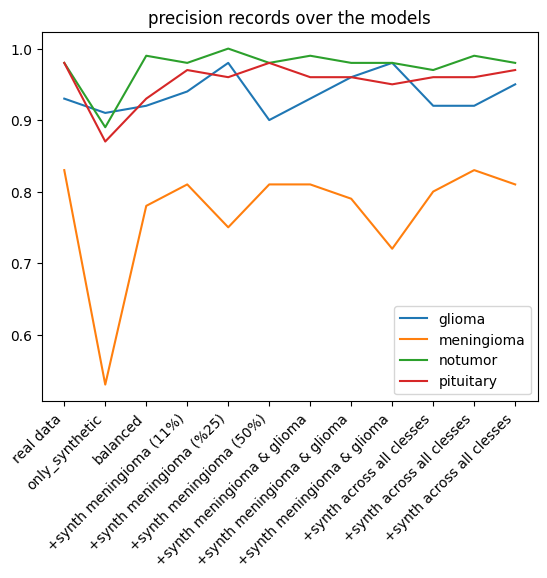

In [119]:
glioma = np.array(values['p'])[:, 0]
meningioma = np.array(values['p'])[:, 1]
notumor = np.array(values['p'])[:, 2]
pituitary = np.array(values['p'])[:, 3]

plt.plot(range(len(glioma)), glioma, label='glioma')
plt.plot(range(len(glioma)), meningioma, label='meningioma')
plt.plot(range(len(glioma)), notumor, label='notumor')
plt.plot(range(len(glioma)), pituitary, label='pituitary')
plt.title('precision records over the models')

plt.xticks(range(len(glioma)), x_labels, rotation=45, ha='right')
plt.legend()
plt.show()

In [120]:
len(x_labels), len(glioma)

(12, 12)

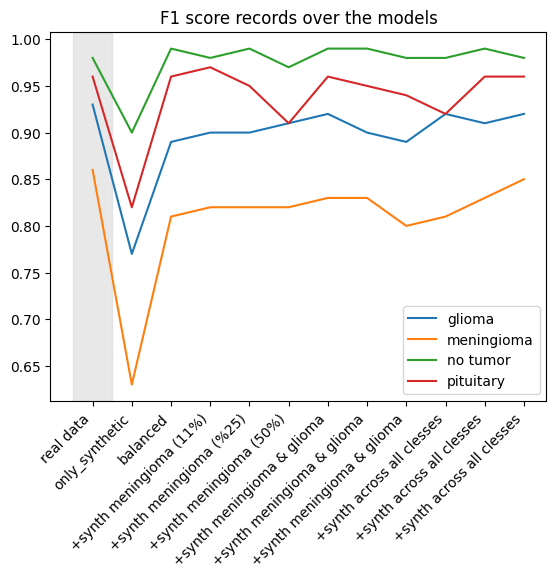

In [122]:
glioma = np.array(values['f'])[:, 0]
meningioma = np.array(values['f'])[:, 1]
notumor = np.array(values['f'])[:, 2]
pituitary = np.array(values['f'])[:, 3]

plt.plot(range(1, len(glioma)+1), glioma, label='glioma')
plt.plot(range(1, len(glioma)+1), meningioma, label='meningioma')
plt.plot(range(1, len(glioma)+1), notumor, label='no tumor')
plt.plot(range(1, len(glioma)+1), pituitary, label='pituitary')
plt.xticks(range(1, len(glioma)+1), x_labels, rotation=45, ha='right')
plt.axvspan(.5, 1.5, color='lightgrey', alpha=0.5)

plt.title('F1 score records over the models')
plt.legend()
plt.show()

In [130]:
x_labels = ['real data', 'only_synthetic', 'balanced', '+synth meningioma (11%)', '+synth meningioma (%25)', '+synth meningioma (50%)', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth across all classes', '+synth across all classes', '+synth across all classes']
groups = [group 1 , no group  , no group, group2 , group2, group2, group3 , group3, group3,  group4, group4, group4]

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1397313488.py, line 2)

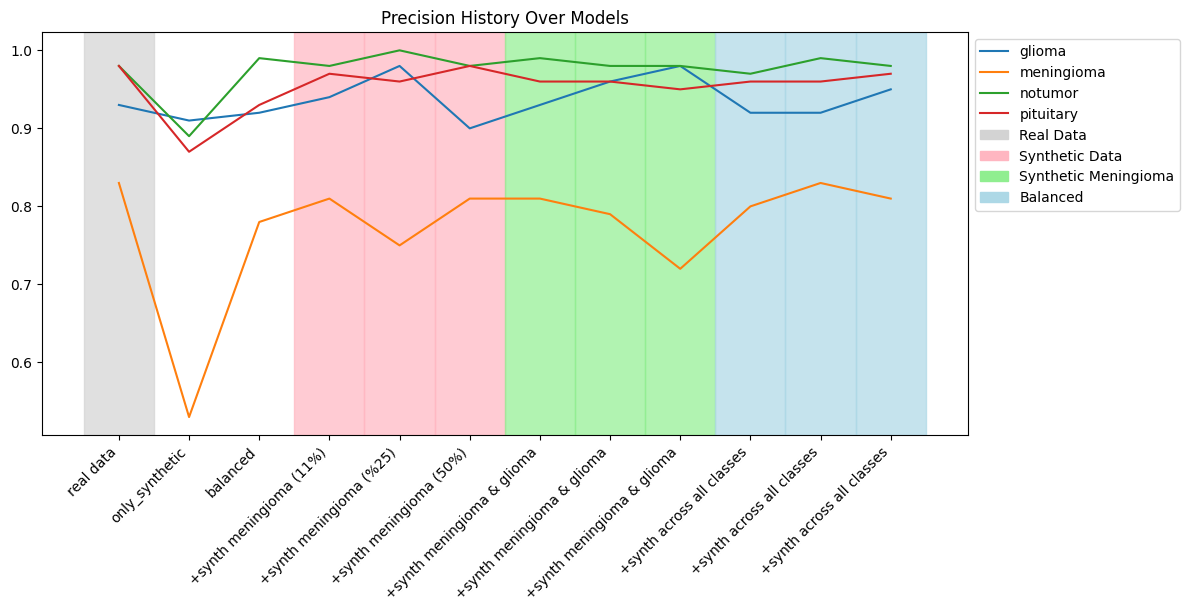

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sample data
x_labels = ['real data', 'only_synthetic', 'balanced', '+synth meningioma (11%)', '+synth meningioma (%25)', '+synth meningioma (50%)', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth across all classes', '+synth across all classes', '+synth across all classes']
glioma = np.array(values['p'])[:, 0]
meningioma = np.array(values['p'])[:, 1]
notumor = np.array(values['p'])[:, 2]
pituitary = np.array(values['p'])[:, 3]
groups = ['group1', 'no_group', 'no_group', 'group2', 'group2', 'group2', 'group3', 'group3', 'group3', 'group4', 'group4', 'group4']

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plotting the data
line1, = plt.plot(range(len(glioma)), glioma, label='glioma')
line2, = plt.plot(range(len(meningioma)), meningioma, label='meningioma')
line3, = plt.plot(range(len(notumor)), notumor, label='notumor')
line4, = plt.plot(range(len(pituitary)), pituitary, label='pituitary')

# Set x-axis ticks and labels with right alignment
plt.xticks(range(len(glioma)), x_labels, rotation=45, ha='right')

# Add background colors and a legend for the background colors
background_colors = {'group1': 'lightgrey', 'group2': 'lightpink', 'group3': 'lightgreen', 'group4': 'lightblue'}
legend_color_labels = ['real data', 'synthetic data', 'synthetic meningioma', 'balanced']

for i, group in enumerate(groups):
    if group in background_colors:
        plt.axvspan(i - 0.5, i + 0.5, color=background_colors[group], alpha=0.7, zorder=-1)

# Create legend for both lines and background colors
legend_handles = [line1, line2, line3, line4]
legend_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create legend for background colors
legend_colors = [
    Rectangle((0, 0), 1, 1, fill=True, color=color, alpha=1.0, zorder=-1) for color in background_colors.values()
]
legend_labels_colors = ['Real Data', 'Synthetic Data', 'Synthetic Meningioma', 'Balanced']

# Combine both legends into a single table legend
legend = plt.legend(handles=legend_handles + legend_colors, labels=legend_labels + legend_labels_colors, loc='upper left', bbox_to_anchor=(1, 1), handler_map={Rectangle: HandlerPatch(patch_func=None)})

# Adjust layout to prevent clipping
plt.tight_layout()

# Set the title
plt.title('Precision History Over Models')
## plt.savefig('precision_history_plot.png')

# Show the plot
plt.show()


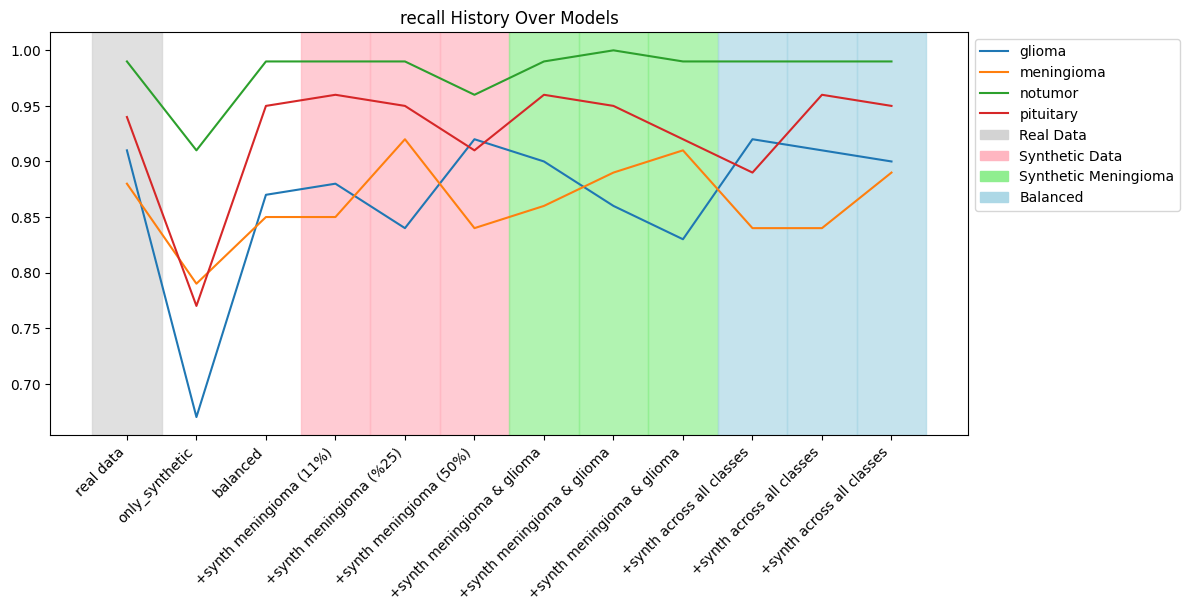

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sample data
x_labels = ['real data', 'only_synthetic', 'balanced', '+synth meningioma (11%)', '+synth meningioma (%25)', '+synth meningioma (50%)', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth across all classes', '+synth across all classes', '+synth across all classes']
glioma = np.array(values['r'])[:, 0]
meningioma = np.array(values['r'])[:, 1]
notumor = np.array(values['r'])[:, 2]
pituitary = np.array(values['r'])[:, 3]
groups = ['group1', 'no_group', 'no_group', 'group2', 'group2', 'group2', 'group3', 'group3', 'group3', 'group4', 'group4', 'group4']

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plotting the data
line1, = plt.plot(range(len(glioma)), glioma, label='glioma')
line2, = plt.plot(range(len(meningioma)), meningioma, label='meningioma')
line3, = plt.plot(range(len(notumor)), notumor, label='notumor')
line4, = plt.plot(range(len(pituitary)), pituitary, label='pituitary')

# Set x-axis ticks and labels with right alignment
plt.xticks(range(len(glioma)), x_labels, rotation=45, ha='right')

# Add background colors and a legend for the background colors
background_colors = {'group1': 'lightgrey', 'group2': 'lightpink', 'group3': 'lightgreen', 'group4': 'lightblue'}
legend_color_labels = ['real data', 'synthetic data', 'synthetic meningioma', 'balanced']

for i, group in enumerate(groups):
    if group in background_colors:
        plt.axvspan(i - 0.5, i + 0.5, color=background_colors[group], alpha=0.7, zorder=-1)

# Create legend for both lines and background colors
legend_handles = [line1, line2, line3, line4]
legend_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create legend for background colors
legend_colors = [
    Rectangle((0, 0), 1, 1, fill=True, color=color, alpha=1.0, zorder=-1) for color in background_colors.values()
]
legend_labels_colors = ['Real Data', 'Synthetic Data', 'Synthetic Meningioma', 'Balanced']

# Combine both legends into a single table legend
legend = plt.legend(handles=legend_handles + legend_colors, labels=legend_labels + legend_labels_colors, loc='upper left', bbox_to_anchor=(1, 1), handler_map={Rectangle: HandlerPatch(patch_func=None)})

# Adjust layout to prevent clipping
plt.tight_layout()

# Set the title
plt.title('recall History Over Models')
## plt.savefig('recall_history_plot.png')

# Show the plot
plt.show()


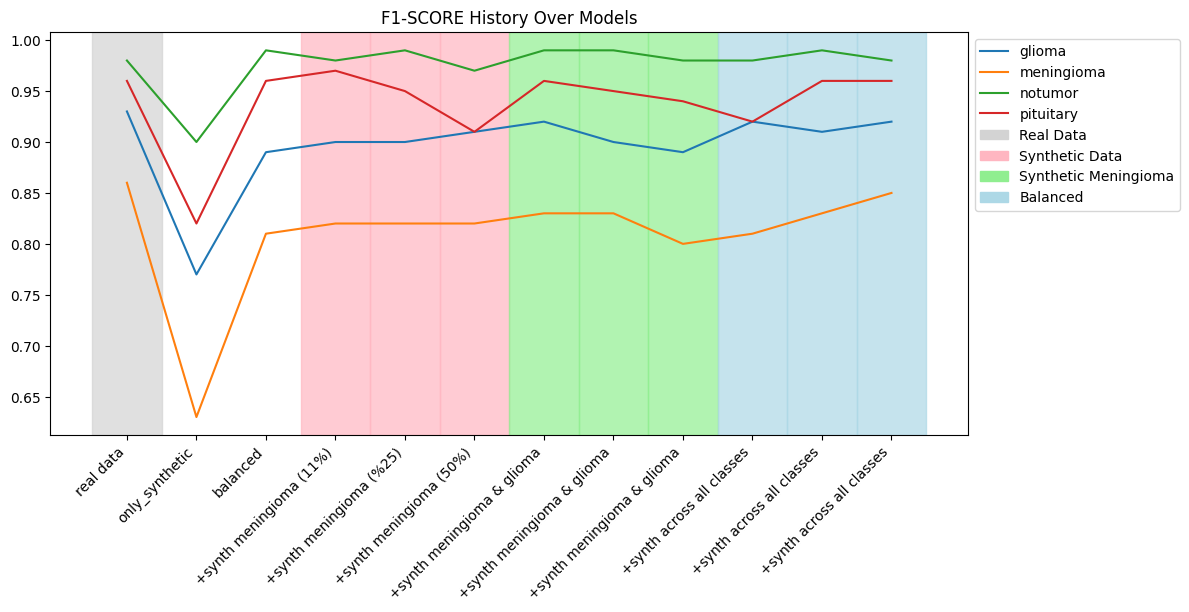

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Sample data
x_labels = ['real data', 'only_synthetic', 'balanced', '+synth meningioma (11%)', '+synth meningioma (%25)', '+synth meningioma (50%)', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth meningioma & glioma', '+synth across all classes', '+synth across all classes', '+synth across all classes']
glioma = np.array(values['f'])[:, 0]
meningioma = np.array(values['f'])[:, 1]
notumor = np.array(values['f'])[:, 2]
pituitary = np.array(values['f'])[:, 3]
groups = ['group1', 'no_group', 'no_group', 'group2', 'group2', 'group2', 'group3', 'group3', 'group3', 'group4', 'group4', 'group4']

# Set a larger figure size
plt.figure(figsize=(12, 6))

# Plotting the data
line1, = plt.plot(range(len(glioma)), glioma, label='glioma')
line2, = plt.plot(range(len(meningioma)), meningioma, label='meningioma')
line3, = plt.plot(range(len(notumor)), notumor, label='notumor')
line4, = plt.plot(range(len(pituitary)), pituitary, label='pituitary')

# Set x-axis ticks and labels with right alignment
plt.xticks(range(len(glioma)), x_labels, rotation=45, ha='right')

# Add background colors and a legend for the background colors
background_colors = {'group1': 'lightgrey', 'group2': 'lightpink', 'group3': 'lightgreen', 'group4': 'lightblue'}
legend_color_labels = ['real data', 'synthetic data', 'synthetic meningioma', 'balanced']

for i, group in enumerate(groups):
    if group in background_colors:
        plt.axvspan(i - 0.5, i + 0.5, color=background_colors[group], alpha=0.7, zorder=-1)

# Create legend for both lines and background colors
legend_handles = [line1, line2, line3, line4]
legend_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Create legend for background colors
legend_colors = [
    Rectangle((0, 0), 1, 1, fill=True, color=color, alpha=1.0, zorder=-1) for color in background_colors.values()
]
legend_labels_colors = ['Real Data', 'Synthetic Data', 'Synthetic Meningioma', 'Balanced']

# Combine both legends into a single table legend
legend = plt.legend(handles=legend_handles + legend_colors, labels=legend_labels + legend_labels_colors, loc='upper left', bbox_to_anchor=(1, 1), handler_map={Rectangle: HandlerPatch(patch_func=None)})

# Adjust layout to prevent clipping
plt.tight_layout()

# Set the title
plt.title('F1-SCORE History Over Models')
## plt.savefig('F1_history_plot.png')

# Show the plot
plt.show()


In [ ]:
metrics[[col for  col in metrics.columns if '.3' in col or  '.4' in col]]

,glioma.3,glioma.4,meningioma.3,meningioma.4,notumor.3,notumor.4,pituitary.3,pituitary.4
0,avg,std,avg,std,avg,std,avg,std
1,0.95,0.042,0.81,0.012,0.98,0.008,0.97,0.005
2,0.9,0.022,0.89,0.043,0.99,0.019,0.95,0.021
3,0.92,0.014,0.85,0.026,0.98,0.008,0.96,0.012


c:\Users\user1\anaconda3\lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


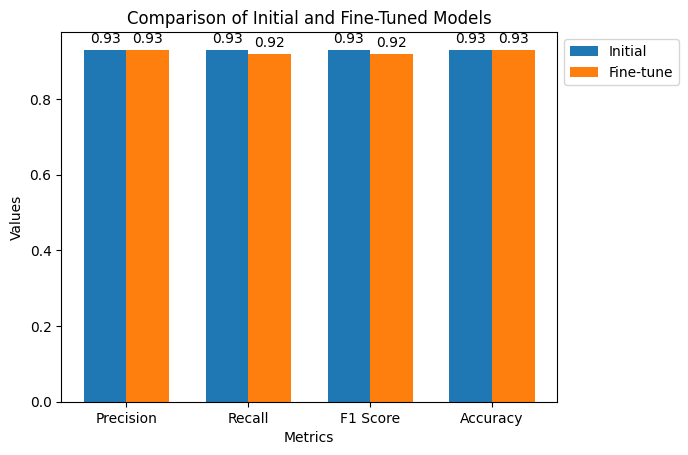

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these values with your actual metrics
precision = 0.93
recall = 0.93
f1 = 0.93
accuracy = 0.93

precision_B = 0.93
recall_B = 0.92
f1_B = 0.92
accuracy_B = 0.93

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values_A = [precision, recall, f1, accuracy]
values_B = [precision_B, recall_B, f1_B, accuracy_B]

bar_width = 0.35
index = np.arange(len(metrics))

fig, ax = plt.subplots()
bars_A = ax.bar(index, values_A, width=bar_width, label='Initial')
bars_B = ax.bar(index + bar_width, values_B, width=bar_width, label='Fine-tune')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Comparison of Initial and Fine-Tuned Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

# Display the exact values at the end of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_A)
autolabel(bars_B)
## plt.savefig('classification_5.png')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()
